# Pre-processing

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.externals.six import StringIO
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay,precision_recall_curve, plot_roc_curve, classification_report
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.naive_bayes import CategoricalNB,GaussianNB

import scikitplot as skplt

import tensorflow as tf 
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import random
import numpy as np
import os
import pandas as pd

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.feature_selection import RFECV

In [ ]:
from sklearn import neighbors, tree, linear_model, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [ ]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.layers import Dense, Conv1D, Flatten
from sklearn.metrics import roc_auc_score
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
from bayes_opt import BayesianOptimization
from skopt import BayesSearchCV 

In [ ]:
from tqdm import tqdm_notebook as tqdm

In [ ]:
train = pd.read_csv('D:/2022-Spring/PDA/Project/train.csv',index_col=0)
test = pd.read_csv('D:/2022-Spring/PDA/Project/test.csv',index_col=0)

In [ ]:
# Split fake data from real data and get the real data's indices (reference: https://www.kaggle.com/code/yag320/list-of-fake-samples-and-public-private-lb-split/notebook)

In [ ]:
test_values = test.values
features = [c for c in train.columns if c not in ['ID_code', 'target']]
unique_samples = []
unique_count = np.zeros_like(test_values)
for feature in tqdm(range(test_values.shape[1])):
    _, index_, count_ = np.unique(test_values[:, feature], return_counts=True, return_index=True)
    unique_count[index_[count_ == 1], feature] += 1

In [ ]:
## Samples which have unique values are real the others are fake
real_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
synthetic_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

print(len(real_samples_indexes))
print(len(synthetic_samples_indexes))

In [ ]:
real_samples_indexes

In [ ]:
d = {}
for i in range(200): d['var_'+str(i)] = 'float32'
d['target'] = 'uint8'
d['ID_code'] = 'object'

train = pd.read_csv('D:/2022-Spring/PDA/Project/train.csv', dtype=d)
test = pd.read_csv('D:/2022-Spring/PDA/Project/test.csv', dtype=d)

In [ ]:
# Add frequency encodes for 200 independent features
def encode_FE(df,col,test):
    cv = df[col].value_counts()
    nm = col+'_FE'
    df[nm] = df[col].map(cv)
    test[nm] = test[col].map(cv)
    test[nm].fillna(0,inplace=True)
    if cv.max()<=255:
        df[nm] = df[nm].astype('uint8')
        test[nm] = test[nm].astype('uint8')
    else:
        df[nm] = df[nm].astype('uint16')
        test[nm] = test[nm].astype('uint16')        
    return

test['target'] = -1
comb = pd.concat([train,test.loc[real_samples_indexes]],axis=0,sort=True)
for i in range(200): 
    encode_FE(comb,'var_'+str(i),test)
train = comb[:len(train)]; del comb
print('Added 200 new magic features!')

In [ ]:
train

In [ ]:
X=train.iloc[:,2:]
y=train.iloc[:,1]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=100)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.3,random_state=100)

In [ ]:
X_test = test.drop('ID_code', axis=1)

In [ ]:
train[train['target'] == 0]['target'].count()

In [ ]:
# imbalance rate
(200000-179902)/179902

# 200 models + stacking

In [52]:
features

['var_0',
 'var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90',
 'var_91'

In [54]:
y_pred_200 = 0
for var in features:
    print(var)
    
    model_1 = CatBoostClassifier(scale_pos_weight=1/11)
    model_2 = XGBClassifier(scale_pos_weight=1/11)
    model_4 = LGBMClassifier(scale_pos_weight=1/11)
    
    var_count_name = var + '_FE'
    all_models = [('xgb', model_2), ('lgbm', model_4)]

     # create meta model
    final_lr = LogisticRegression(class_weight='balanced', solver='saga')

    # stacked model
    stack = StackingClassifier(estimators=all_models,
                           final_estimator=final_lr,
                           cv=None,
                           stack_method='predict_proba',
                           n_jobs=-1,
                           passthrough=True, # Train final model on predictions and base data
                           verbose=1)
    model = stack.fit(np.hstack([X_train[var].values.reshape(-1, 1),
                      X_train[var_count_name].values.reshape(-1, 1)]), y_train.values)
    
    y_pred_200 += model.predict_proba(np.hstack([X_test[var].values.reshape(-1, 1),
                  X_test[var_count_name].values.reshape(-1, 1)]))[:, 1]

var_0
var_1
var_2
var_3
var_4
var_5
var_6
var_7


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [ ]:
submission_200 = pd.DataFrame({"ID_code": test.iloc[:,0]})
submission_200["target"] = y_pred_200/200
submission_200.to_csv("submission_200.csv", index=False)

## LGBM 0.891

In [316]:
lgbm_model = LGBMClassifier(**{
     'learning_rate': 0.04,
     'num_leaves': 31,
     'max_bin': 1023,
     'min_child_samples': 1000,
     'reg_alpha': 0.1,
     'reg_lambda': 0.2,
     'feature_fraction': 1.0,
     'bagging_freq': 1,
     'bagging_fraction': 0.85,
     'objective': 'binary',
     'n_jobs': -1,
     'n_estimators':400,
     'class_weight':{0:1, 1:0.1}})

In [317]:
lgbm_model.fit(X_train,y_train,)

LGBMClassifier(bagging_fraction=0.85, bagging_freq=1,
               class_weight={0: 1, 1: 0.1}, feature_fraction=1.0,
               learning_rate=0.04, max_bin=1023, min_child_samples=1000,
               n_estimators=400, objective='binary', reg_alpha=0.1,
               reg_lambda=0.2)

In [318]:
y_pred_lgbm = lgbm_model.predict_proba(test[features])[:,1] 
submission_lgbm = pd.DataFrame({"ID_code": test.iloc[:,0]})
submission_lgbm["target"] = y_pred_lgbm
submission_lgbm.to_csv("submission_lgbm.csv", index=False)
# score: 0.89

In [319]:
roc = plot_roc_curve(model, X_test, y_test)

C:\Users\Yujun Wang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ValueError: response method decision_function or predict_proba is not defined in StackingClassifier

## CNN 0.87

In [202]:
X

,var_0,var_1,var_10,var_100,var_101,var_102,var_103,var_104,var_105,var_106,...,var_190_FE,var_191_FE,var_192_FE,var_193_FE,var_194_FE,var_195_FE,var_196_FE,var_197_FE,var_198_FE,var_199_FE
0,8.9255,-6.7863,2.9252,9.476300,13.310200,26.537600,1.4403,14.7100,6.0454,9.5426,...,3,8,9,4,9,5,5,14,5,2
1,11.5006,-4.1473,-0.4032,-13.695000,8.406800,35.473400,1.7093,15.1866,2.6227,7.3412,...,8,5,9,2,4,4,4,21,6,2
2,8.6093,-2.7457,-0.3249,-0.393900,12.631700,14.886300,1.3854,15.0284,3.9995,5.3683,...,4,5,6,2,2,2,3,12,4,2
3,11.0604,-2.1518,2.3061,-19.859200,22.531601,18.612900,1.3512,9.3291,4.2835,10.3907,...,2,3,6,4,4,8,5,4,2,2
4,9.8369,-1.4834,-9.4458,-22.926399,12.356200,17.341000,1.6940,7.1179,5.1934,8.8230,...,3,8,1,1,1,9,5,9,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,11.4880,-0.4956,3.7574,-18.847300,9.935800,25.335899,1.3647,11.8509,5.0357,6.4630,...,4,1,5,5,3,7,1,16,4,2
199996,4.9149,-2.4484,6.5576,-15.529400,9.550100,11.854800,1.5127,11.3998,4.2304,6.6777,...,2,3,8,1,2,6,4,4,7,2
199997,11.2232,-5.0518,4.4004,-8.057400,10.060600,25.253500,1.8019,10.4973,4.2183,9.1158,...,3,4,5,3,2,7,4,17,4,1
199998,9.7148,-8.6098,1.4245,-2.389100,24.662600,19.778299,1.5780,14.3962,4.8206,12.2354,...,6,6,3,2,7,7,2,7,6,1


In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=100)

In [214]:
y_train

195896    1
47114     0
144875    0
184791    0
123269    0
         ..
194442    1
65615     0
77655     0
56088     0
38408     0
Name: target, Length: 140000, dtype: int64

In [225]:
X_train.shape[1], 1

(400, 1)

In [234]:
N_units = 400
kernel_size=2
strides=2
cnn_model = Sequential()
cnn_model.add(Conv1D(N_units, kernel_size=kernel_size, strides=strides, padding='valid', 
                     activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation = 'sigmoid'))
    
cnn_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_21 (Conv1D)          (None, 200, 400)          1200      
                                                                 
 flatten_21 (Flatten)        (None, 80000)             0         
                                                                 
 dense_21 (Dense)            (None, 1)                 80001     
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


In [235]:
epochs = 10
LR_callback = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=2, factor=.5, min_lr=.0001)
EarlyStop_callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True)
my_callback=[EarlyStop_callback, LR_callback]

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, 
              validation_data=(X_test, y_test),
              epochs=epochs,
              verbose=2,
              callbacks = my_callback,
              )

Epoch 1/10
4375/4375 - 86s - loss: 0.2971 - accuracy: 0.9028 - val_loss: 0.2555 - val_accuracy: 0.9089 - lr: 0.0010 - 86s/epoch - 20ms/step
Epoch 2/10
4375/4375 - 92s - loss: 0.2502 - accuracy: 0.9090 - val_loss: 0.2427 - val_accuracy: 0.9098 - lr: 0.0010 - 92s/epoch - 21ms/step
Epoch 3/10
4375/4375 - 86s - loss: 0.2403 - accuracy: 0.9124 - val_loss: 0.2573 - val_accuracy: 0.9053 - lr: 0.0010 - 86s/epoch - 20ms/step
Epoch 4/10
4375/4375 - 87s - loss: 0.2364 - accuracy: 0.9130 - val_loss: 0.2334 - val_accuracy: 0.9136 - lr: 0.0010 - 87s/epoch - 20ms/step
Epoch 5/10
4375/4375 - 89s - loss: 0.2324 - accuracy: 0.9147 - val_loss: 0.2305 - val_accuracy: 0.9152 - lr: 0.0010 - 89s/epoch - 20ms/step
Epoch 6/10
4375/4375 - 86s - loss: 0.2303 - accuracy: 0.9156 - val_loss: 0.2290 - val_accuracy: 0.9149 - lr: 0.0010 - 86s/epoch - 20ms/step
Epoch 7/10
4375/4375 - 85s - loss: 0.2289 - accuracy: 0.9151 - val_loss: 0.2249 - val_accuracy: 0.9162 - lr: 0.0010 - 85s/epoch - 20ms/step
Epoch 8/10
4375/4375

In [236]:
y_pred_cnn = cnn_model.predict(test[features])

In [222]:
y_pred_cnn

array([[0.06314817],
       [0.0754644 ],
       [0.11738187],
       ...,
       [0.0029299 ],
       [0.05230972],
       [0.01667929]], dtype=float32)

In [237]:
submission_cnn = pd.DataFrame({"ID_code": test.iloc[:,0]})
submission_cnn["target"] = y_pred_cnn
submission_cnn.to_csv("submission_cnn.csv", index=False)
# score: 0.875

# XGBoost 0.895

In [110]:
xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=5000, n_jobs=4, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=1)

In [310]:
# try with another parameter combination score:0.8934
xgb_model = XGBClassifier(learning_rate=0.1,max_depth=5,scale_pos_weight=1/11,n_estimators=400)

In [311]:
xgb_model.fit(X_train,y_train)

[09:48:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.09090909090909091,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [312]:
y_pred_xgb = xgb_model.predict_proba(test[features])[:,1] 

In [313]:
submission_xgb = pd.DataFrame({"ID_code": test.iloc[:,0]})
submission_xgb["target"] = y_pred_xgb
submission_xgb.to_csv("submission_xgb.csv", index=False)
# 0.89527 LB

# CatBoost 0.896

In [60]:
cat_model = CatBoostClassifier(scale_pos_weight=1/11)
cat_model.fit(X_train,y_train)

Learning rate set to 0.084983
0:	learn: 0.5203676	total: 101ms	remaining: 1m 41s
1:	learn: 0.3946951	total: 179ms	remaining: 1m 29s
2:	learn: 0.3040008	total: 283ms	remaining: 1m 34s
3:	learn: 0.2391217	total: 362ms	remaining: 1m 30s
4:	learn: 0.1920484	total: 459ms	remaining: 1m 31s
5:	learn: 0.1582466	total: 545ms	remaining: 1m 30s
6:	learn: 0.1335917	total: 618ms	remaining: 1m 27s
7:	learn: 0.1152838	total: 708ms	remaining: 1m 27s
8:	learn: 0.1017257	total: 786ms	remaining: 1m 26s
9:	learn: 0.0915863	total: 858ms	remaining: 1m 24s
10:	learn: 0.0838948	total: 910ms	remaining: 1m 21s
11:	learn: 0.0779929	total: 975ms	remaining: 1m 20s
12:	learn: 0.0733627	total: 1.05s	remaining: 1m 20s
13:	learn: 0.0698229	total: 1.12s	remaining: 1m 19s
14:	learn: 0.0668983	total: 1.19s	remaining: 1m 18s
15:	learn: 0.0646561	total: 1.27s	remaining: 1m 18s
16:	learn: 0.0627405	total: 1.36s	remaining: 1m 18s
17:	learn: 0.0611685	total: 1.43s	remaining: 1m 18s
18:	learn: 0.0599582	total: 1.5s	remaining: 

161:	learn: 0.0455550	total: 11.3s	remaining: 58.4s
162:	learn: 0.0455195	total: 11.4s	remaining: 58.3s
163:	learn: 0.0454845	total: 11.4s	remaining: 58.2s
164:	learn: 0.0454496	total: 11.5s	remaining: 58.1s
165:	learn: 0.0454090	total: 11.5s	remaining: 58s
166:	learn: 0.0453836	total: 11.6s	remaining: 57.9s
167:	learn: 0.0453493	total: 11.7s	remaining: 57.9s
168:	learn: 0.0453105	total: 11.8s	remaining: 57.8s
169:	learn: 0.0452729	total: 11.8s	remaining: 57.8s
170:	learn: 0.0452447	total: 11.9s	remaining: 57.7s
171:	learn: 0.0452192	total: 12s	remaining: 57.6s
172:	learn: 0.0451918	total: 12s	remaining: 57.5s
173:	learn: 0.0451655	total: 12.1s	remaining: 57.4s
174:	learn: 0.0451326	total: 12.2s	remaining: 57.4s
175:	learn: 0.0450983	total: 12.2s	remaining: 57.3s
176:	learn: 0.0450536	total: 12.3s	remaining: 57.3s
177:	learn: 0.0450253	total: 12.4s	remaining: 57.2s
178:	learn: 0.0449947	total: 12.5s	remaining: 57.2s
179:	learn: 0.0449639	total: 12.5s	remaining: 57.1s
180:	learn: 0.0449

322:	learn: 0.0413931	total: 23s	remaining: 48.3s
323:	learn: 0.0413681	total: 23.1s	remaining: 48.2s
324:	learn: 0.0413526	total: 23.2s	remaining: 48.1s
325:	learn: 0.0413290	total: 23.2s	remaining: 48.1s
326:	learn: 0.0413122	total: 23.3s	remaining: 48s
327:	learn: 0.0412864	total: 23.4s	remaining: 47.9s
328:	learn: 0.0412653	total: 23.5s	remaining: 47.9s
329:	learn: 0.0412465	total: 23.5s	remaining: 47.8s
330:	learn: 0.0412289	total: 23.6s	remaining: 47.7s
331:	learn: 0.0412178	total: 23.7s	remaining: 47.6s
332:	learn: 0.0412008	total: 23.7s	remaining: 47.6s
333:	learn: 0.0411816	total: 23.8s	remaining: 47.5s
334:	learn: 0.0411624	total: 23.9s	remaining: 47.5s
335:	learn: 0.0411457	total: 24s	remaining: 47.4s
336:	learn: 0.0411269	total: 24.1s	remaining: 47.3s
337:	learn: 0.0411028	total: 24.1s	remaining: 47.3s
338:	learn: 0.0410836	total: 24.2s	remaining: 47.2s
339:	learn: 0.0410598	total: 24.3s	remaining: 47.1s
340:	learn: 0.0410389	total: 24.4s	remaining: 47.1s
341:	learn: 0.0410

483:	learn: 0.0390646	total: 34.3s	remaining: 36.6s
484:	learn: 0.0390570	total: 34.4s	remaining: 36.5s
485:	learn: 0.0390568	total: 34.4s	remaining: 36.4s
486:	learn: 0.0390375	total: 34.5s	remaining: 36.3s
487:	learn: 0.0390255	total: 34.6s	remaining: 36.3s
488:	learn: 0.0390064	total: 34.6s	remaining: 36.2s
489:	learn: 0.0389875	total: 34.7s	remaining: 36.1s
490:	learn: 0.0389729	total: 34.8s	remaining: 36.1s
491:	learn: 0.0389634	total: 34.8s	remaining: 36s
492:	learn: 0.0389504	total: 34.9s	remaining: 35.9s
493:	learn: 0.0389372	total: 35s	remaining: 35.8s
494:	learn: 0.0389239	total: 35s	remaining: 35.8s
495:	learn: 0.0389162	total: 35.1s	remaining: 35.7s
496:	learn: 0.0389047	total: 35.2s	remaining: 35.6s
497:	learn: 0.0388974	total: 35.2s	remaining: 35.5s
498:	learn: 0.0388874	total: 35.3s	remaining: 35.5s
499:	learn: 0.0388783	total: 35.4s	remaining: 35.4s
500:	learn: 0.0388779	total: 35.4s	remaining: 35.3s
501:	learn: 0.0388707	total: 35.5s	remaining: 35.2s
502:	learn: 0.0388

642:	learn: 0.0373679	total: 45.5s	remaining: 25.2s
643:	learn: 0.0373524	total: 45.5s	remaining: 25.2s
644:	learn: 0.0373407	total: 45.6s	remaining: 25.1s
645:	learn: 0.0373327	total: 45.7s	remaining: 25s
646:	learn: 0.0373234	total: 45.8s	remaining: 25s
647:	learn: 0.0373086	total: 45.8s	remaining: 24.9s
648:	learn: 0.0372992	total: 45.9s	remaining: 24.8s
649:	learn: 0.0372921	total: 46s	remaining: 24.8s
650:	learn: 0.0372811	total: 46s	remaining: 24.7s
651:	learn: 0.0372809	total: 46.1s	remaining: 24.6s
652:	learn: 0.0372660	total: 46.2s	remaining: 24.5s
653:	learn: 0.0372599	total: 46.2s	remaining: 24.5s
654:	learn: 0.0372529	total: 46.3s	remaining: 24.4s
655:	learn: 0.0372428	total: 46.4s	remaining: 24.3s
656:	learn: 0.0372361	total: 46.4s	remaining: 24.2s
657:	learn: 0.0372172	total: 46.5s	remaining: 24.2s
658:	learn: 0.0372075	total: 46.6s	remaining: 24.1s
659:	learn: 0.0371953	total: 46.7s	remaining: 24s
660:	learn: 0.0371865	total: 46.8s	remaining: 24s
661:	learn: 0.0371771	to

802:	learn: 0.0359777	total: 57s	remaining: 14s
803:	learn: 0.0359752	total: 57.1s	remaining: 13.9s
804:	learn: 0.0359638	total: 57.2s	remaining: 13.8s
805:	learn: 0.0359584	total: 57.2s	remaining: 13.8s
806:	learn: 0.0359514	total: 57.3s	remaining: 13.7s
807:	learn: 0.0359511	total: 57.3s	remaining: 13.6s
808:	learn: 0.0359451	total: 57.4s	remaining: 13.6s
809:	learn: 0.0359348	total: 57.5s	remaining: 13.5s
810:	learn: 0.0359347	total: 57.5s	remaining: 13.4s
811:	learn: 0.0359252	total: 57.6s	remaining: 13.3s
812:	learn: 0.0359195	total: 57.7s	remaining: 13.3s
813:	learn: 0.0359191	total: 57.7s	remaining: 13.2s
814:	learn: 0.0359111	total: 57.8s	remaining: 13.1s
815:	learn: 0.0359058	total: 57.9s	remaining: 13.1s
816:	learn: 0.0359057	total: 57.9s	remaining: 13s
817:	learn: 0.0358992	total: 58s	remaining: 12.9s
818:	learn: 0.0358954	total: 58.1s	remaining: 12.8s
819:	learn: 0.0358871	total: 58.1s	remaining: 12.8s
820:	learn: 0.0358816	total: 58.2s	remaining: 12.7s
821:	learn: 0.035874

964:	learn: 0.0349789	total: 1m 7s	remaining: 2.45s
965:	learn: 0.0349741	total: 1m 7s	remaining: 2.38s
966:	learn: 0.0349683	total: 1m 7s	remaining: 2.31s
967:	learn: 0.0349656	total: 1m 7s	remaining: 2.24s
968:	learn: 0.0349599	total: 1m 7s	remaining: 2.17s
969:	learn: 0.0349597	total: 1m 7s	remaining: 2.1s
970:	learn: 0.0349524	total: 1m 7s	remaining: 2.03s
971:	learn: 0.0349456	total: 1m 8s	remaining: 1.96s
972:	learn: 0.0349453	total: 1m 8s	remaining: 1.89s
973:	learn: 0.0349387	total: 1m 8s	remaining: 1.82s
974:	learn: 0.0349249	total: 1m 8s	remaining: 1.75s
975:	learn: 0.0349212	total: 1m 8s	remaining: 1.68s
976:	learn: 0.0349105	total: 1m 8s	remaining: 1.61s
977:	learn: 0.0349051	total: 1m 8s	remaining: 1.54s
978:	learn: 0.0348992	total: 1m 8s	remaining: 1.47s
979:	learn: 0.0348957	total: 1m 8s	remaining: 1.4s
980:	learn: 0.0348953	total: 1m 8s	remaining: 1.33s
981:	learn: 0.0348946	total: 1m 8s	remaining: 1.26s
982:	learn: 0.0348867	total: 1m 8s	remaining: 1.19s
983:	learn: 0.

In [61]:
y_pred_cat = cat_model.predict_proba(X_test)[:,1] 
submission_cat = pd.DataFrame({"ID_code": test.iloc[:,0]})
submission_cat["target"] = y_pred_cat
submission_cat.to_csv("submission_cat.csv", index=False)

# SVC drop (too slow)

In [ ]:
svc_model = SVC(kernel="rbf")#, gamma=0.1, C=1000)
svc_model.fit(X_train,y_train)
y_pred_svc = svc_model.predict_proba(test[features])[:,1] 
submission_svc = pd.DataFrame({"ID_code": test.iloc[:,0]})
submission_svc["target"] = y_pred_svc
submission_svc.to_csv("submission_svc.csv", index=False)

# Stacking 0.89

In [298]:

model_1 = XGBClassifier(learning_rate=0.1,max_depth=5,scale_pos_weight=1/11,n_estimators=400)
model_2 = LGBMClassifier(**{
     'learning_rate': 0.04,
     'num_leaves': 31,
     'max_bin': 1023,
     'min_child_samples': 1000,
     'reg_alpha': 0.1,
     'reg_lambda': 0.2,
     'feature_fraction': 1.0,
     'bagging_freq': 1,
     'bagging_fraction': 0.85,
     'objective': 'binary',
     'n_jobs': -1,
     'n_estimators':400})
model_3 = SVC(kernel="rbf", gamma=0.1, C=1000)
model_4 = CatBoostClassifier(learning_rate=0.05,scale_pos_weight=1/11)

# putting all base model objects in one list
all_models = [('xgb', model_1), ('lgbm', model_2),('svc',model_3)]
 
# create meta model
final_lr = LogisticRegression(class_weight='balanced',
                              solver='saga')

# stacked model
stack = StackingClassifier(estimators=all_models,
                           final_estimator=final_lr,
                           cv=None,
                           stack_method='predict_proba',
                           passthrough=True, # Train final model on predictions and base data
                           verbose=1)

In [299]:
stack.fit(X, y)

C:\Users\Yujun Wang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:12:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Yujun Wang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:14:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Yujun Wang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:16:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Yujun Wang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:17:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Yujun Wang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Yujun Wang\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:21:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished
C:\Users\Yujun Wang\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constra...


In [300]:
y_pred_stack = stack.predict_proba(test[features])[:,1] 

In [301]:

submission_stack = pd.DataFrame({"ID_code": test.iloc[:,0]})
submission_stack["target"] = y_pred_stack
submission_stack.to_csv("submission_stack.csv", index=False)

# LGBM Scale drop

In [15]:
# Apply standardization to features
# Apply Scaling to X_train and X_test
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [22]:
X_train_std

array([[ 0.75166528,  0.24145398, -0.6563144 , ..., -1.13812123,
         0.44822196,  1.6068841 ],
       [ 0.18762057,  1.26171109,  1.41406922, ..., -1.73949474,
         0.61577357, -1.57570455],
       [-0.62386073,  0.34921302,  0.60623758, ...,  0.61452112,
        -0.64109605,  0.25351976],
       ...,
       [-0.39869081,  0.65063244, -0.11673668, ..., -0.46565365,
        -1.56302854,  1.34118324],
       [-0.45781603,  0.76238804,  0.2503975 , ...,  0.93151832,
         0.06246128, -0.61965906],
       [-0.82745571, -0.24047664, -0.00978379, ..., -0.52146683,
        -0.55878183,  1.01441615]])

In [125]:
model_std=model.fit(X_train_std,y_train)
# score: 0.68

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.85, subsample=1.0 will be ignored. Current value: bagging_fraction=0.85
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\Users\Yujun Wang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


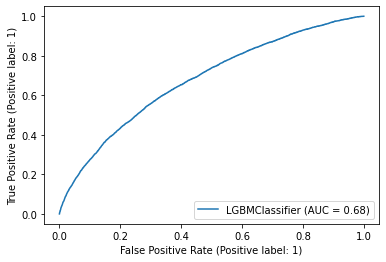

In [17]:
roc_std=plot_roc_curve(model_std, X_test, y_test)

In [97]:
features = [c for c in train.columns if c not in ['ID_code', 'target']]
y_pred = model.predict_proba(test[features])[:,1] 

In [126]:
y_pred_std = model_std.predict_proba(test[features])[:,1] 
submission_std = pd.DataFrame({"ID_code": test.iloc[:,0]})
submission_std["target"] = y_pred_std
submission_std.to_csv("submission_std.csv", index=False)

In [105]:
submission = pd.DataFrame({"ID_code": test.iloc[:,0]})
submission["target"] = y_pred
submission.to_csv("submission.csv", index=False)

# Draft

In [275]:
def get_stacking(input_shape=None):
    '''A stacking model that consists of CatBoostRegressor,
    XGBRegressor, a linear model, and some neural networks'''
    # First we create a list called "level0", which consists of our base models"
    # These models will get passed down to the meta-learner later
    level0 = list()
    #level0.append(('cat', CatBoostRegressor(verbose=False)))
    #level0.append(('cat2', CatBoostRegressor(verbose=False, learning_rate=.0001)))
    level0.append(('xgb', XGBClassifier()))
    level0.append(('xgb2', XGBClassifier(
              base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=5000, n_jobs=4, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=1)))
    level0.append(('lgbm',LGBMClassifier(**{
     'learning_rate': 0.04,
     'num_leaves': 31,
     'max_bin': 1023,
     'min_child_samples': 1000,
     'reg_alpha': 0.1,
     'reg_lambda': 0.2,
     'feature_fraction': 1.0,
     'bagging_freq': 1,
     'bagging_fraction': 0.85,
     'objective': 'binary',
     'n_jobs': -1,
     'n_estimators':400})))
    N_units = 400
    kernel_size=2
    strides=2
    cnn_model = Sequential()
    cnn_model.add(Conv1D(N_units, kernel_size=kernel_size, strides=strides, padding='valid', 
                     activation='relu', input_shape=(X_train.shape[1], 1)))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(1, activation = 'sigmoid'))
    epochs = 10
    LR_callback = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=2, factor=.5, min_lr=.0001)
    EarlyStop_callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True)
    my_callback=[EarlyStop_callback, LR_callback]
    cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    level0.append(('nn_{num}'.format(num=i), cnn_model))
    level1 =LogisticRegression()
    # Create the stacking ensemble
    model_stack = StackingClassifier(estimators=level0, final_estimator=level1,cv=2,verbose=1)
    return model_stack
#model_stack = get_stacking(400)
#model_stack.fit(X_train, y_train)